# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

from pandas import Series

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
ts = df.set_index('Month')
ts.index = pd.to_datetime(ts.index)

In [4]:
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


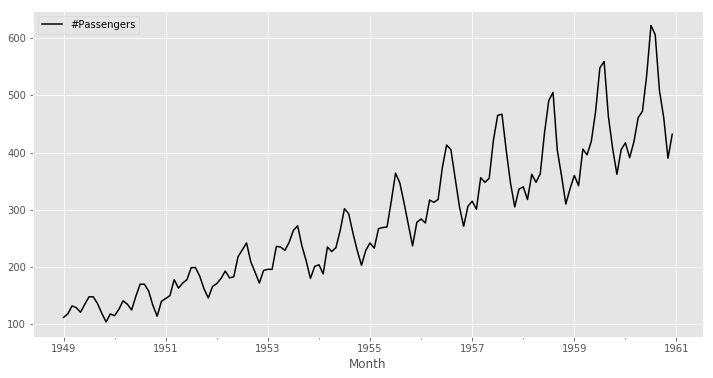

In [21]:
ts.plot(color='black', figsize=(12,6));

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [24]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TimeSeries):
    
    # calculate rolling mean and std
    rolling_mean = TimeSeries.rolling(window=8, center=False).mean()
    rolling_std = TimeSeries.rolling(window=8, center=False).std()
    
    # plot data along with rolling mean and std
    plt.figure(figsize=(10,5))
    plt.plot(TimeSeries, color='black', label="Original Data")
    plt.plot(rolling_mean, color='olive', label="Rolling Mean")
    plt.plot(rolling_std, color='deeppink', label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation");
    
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(TimeSeries['#Passengers'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


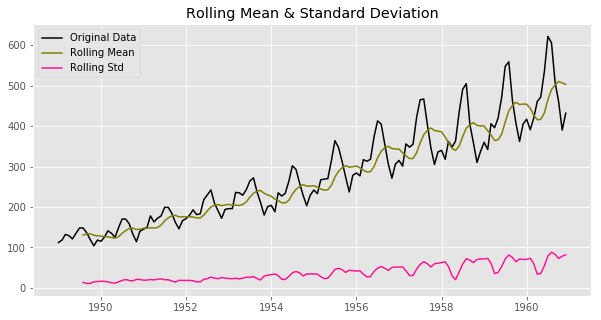

In [25]:
stationarity_check(ts)

## Perform a log() and sqrt() transform

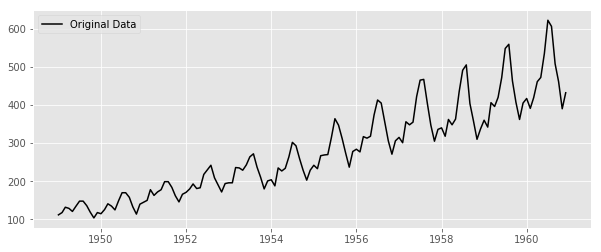

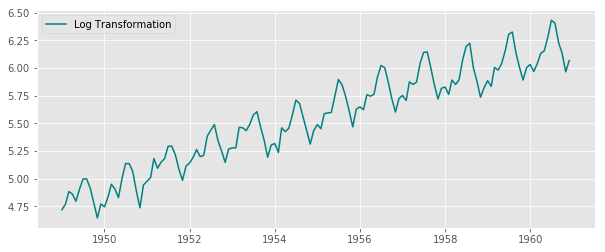

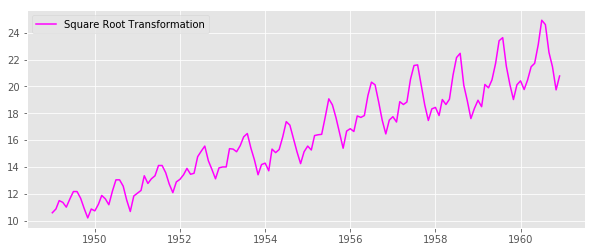

In [8]:
# Log transform timeseries and compare with original to check the effect

log_data = np.log(ts)
sqrt_data = np.sqrt(ts)

fig = plt.figure(figsize=(10,4))
plt.plot(ts, color="black", label='Original Data')
plt.legend()

fig = plt.figure(figsize=(10,4))
plt.plot(log_data, color="teal", label='Log Transformation')
plt.legend()

fig = plt.figure(figsize=(10,4))
plt.plot(sqrt_data, color="magenta", label='Square Root Transformation')
plt.legend()

plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

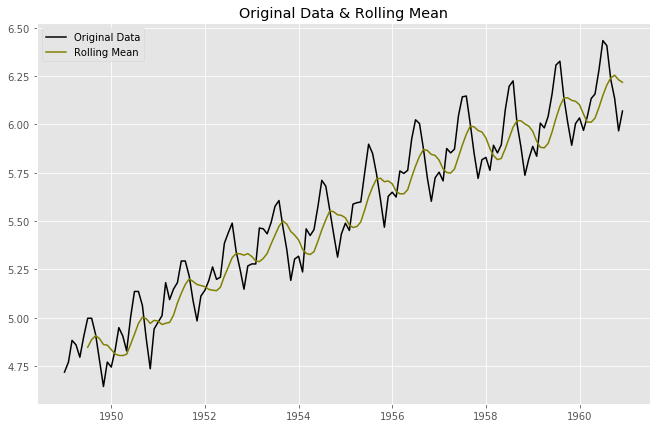

In [9]:
# Create a rolling mean using your log transformed time series
rolling_mean = np.log(ts).rolling(window=7).mean()

fig = plt.figure(figsize=(11,7))

# Plot the log-transformed time series and the rolling mean together
plt.plot(np.log(ts), color='black', label='Original Data')
plt.plot(rolling_mean, color='olive', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Original Data & Rolling Mean')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [10]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolling_mean = np.log(ts) - rolling_mean
data_minus_rolling_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [11]:
# Drop the NaN values from timeseries calculated above
data_minus_rolling_mean.dropna(inplace=True)

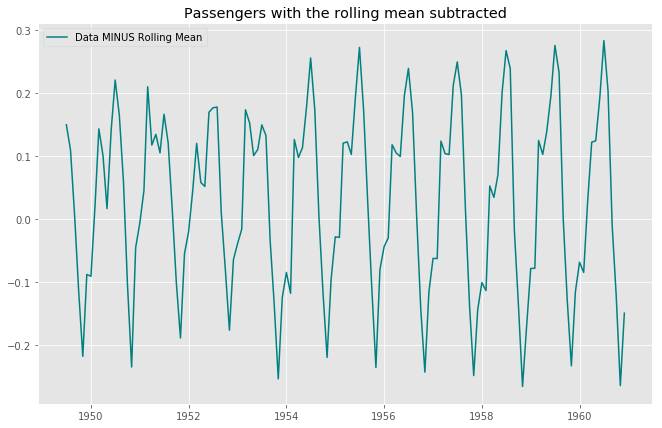

In [12]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolling_mean, color='teal',label='Data MINUS Rolling Mean')
plt.legend(loc='best')
plt.title('Passengers with the rolling mean subtracted')
plt.show(block=False)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


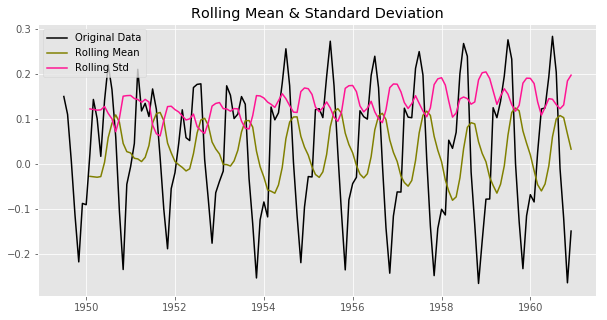

In [13]:
stationarity_check(data_minus_rolling_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
The p-value is 0.15 (substantially above our thrshold of 0.05) where we have to keep the null hypothesis concluding the time series are not stationary.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

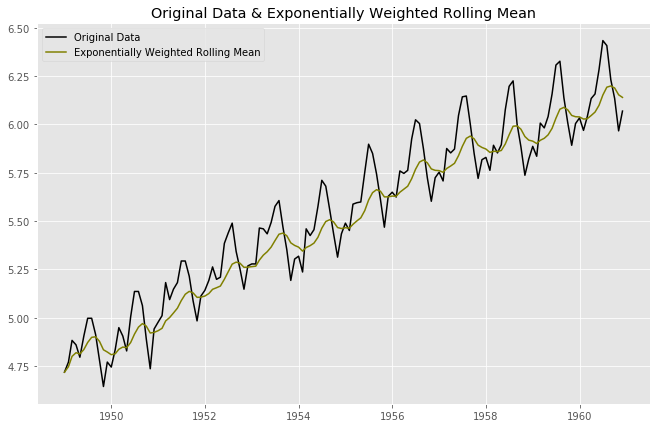

In [14]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
weighted_mean = np.log(ts).ewm(halflife=4).mean()

fig = plt.figure(figsize=(11,7))

# Plot the original data with exp weighted average
plt.plot(np.log(ts), color='black', label='Original Data')
plt.plot(weighted_mean, color='olive', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Original Data & Exponentially Weighted Rolling Mean')
plt.show(block=False)

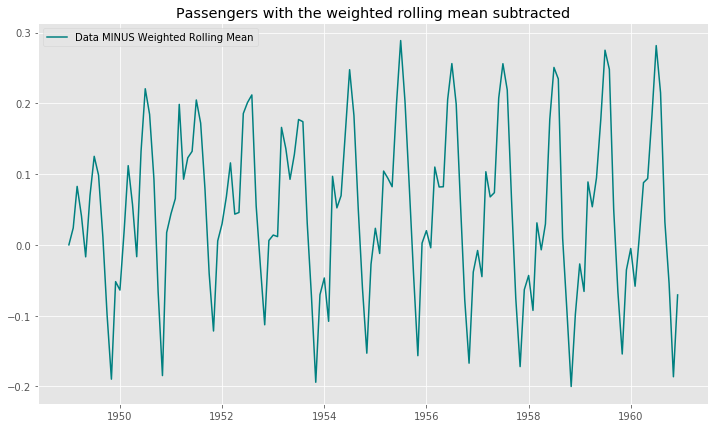

In [15]:
# Subtract the moving average from the original data and plot
data_minus_exp_rolmean = np.log(ts) - weighted_mean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(12,7))
plt.plot(data_minus_exp_rolmean, color='teal', label='Data MINUS Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Passengers with the weighted rolling mean subtracted')
plt.show(block=False)

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


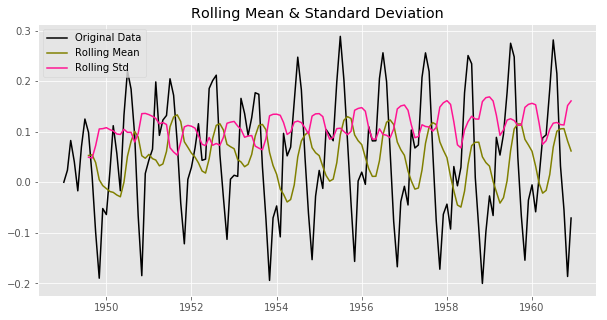

In [16]:
# do a stationarity check
stationarity_check(data_minus_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
The p-value decreased to 0.015 and therfore < 0.05 where we may reject the null hypothesis concluding the time series are stationary.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [17]:
# difference your data and look at the head
data_diff = data_minus_exp_rolmean.diff(periods=12)
data_diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


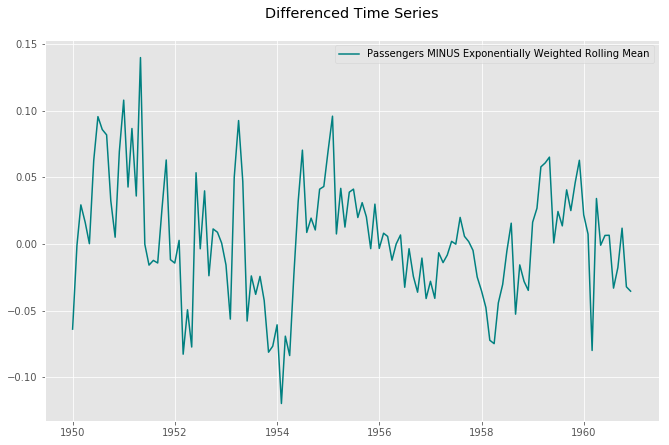

In [18]:
# plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='teal', label='Passengers MINUS Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Time Series\n')
plt.show(block=False)

In [19]:
# drop nas
data_diff.dropna(inplace=True)

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


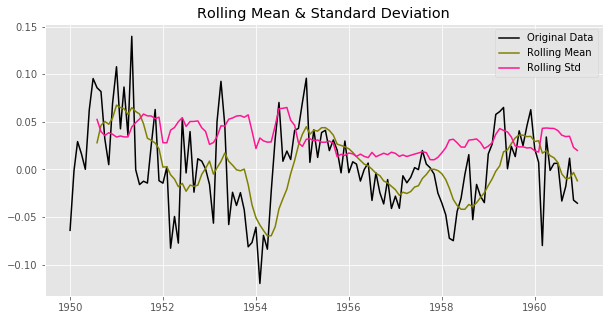

In [20]:
# perform the stationarity check
stationarity_check(data_diff)

### Your conclusion
Even though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be completely random, and the same conclusion holds for the original time series. Your time series is now ready for modeling!

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.